import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("./train.csv")
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


Visualise sales

In [3]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [4]:
df = df.astype({"date": "datetime64"})
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

<AxesSubplot:xlabel='date', ylabel='sales'>

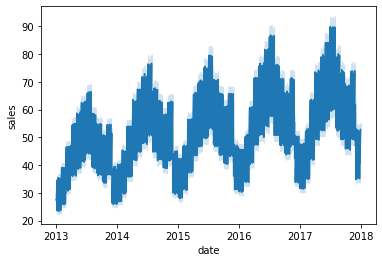

In [5]:
sb.lineplot(data=df, x="date", y="sales")

In [6]:
df = df.set_index("date")
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [7]:
item1 = df.query("item == 1 & store == 1")
item1.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


<AxesSubplot:xlabel='date', ylabel='sales'>

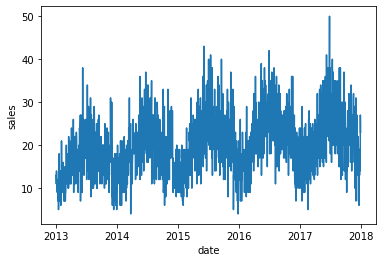

In [8]:
sb.lineplot(data=item1, x="date", y="sales")

<AxesSubplot:xlabel='date', ylabel='resid'>

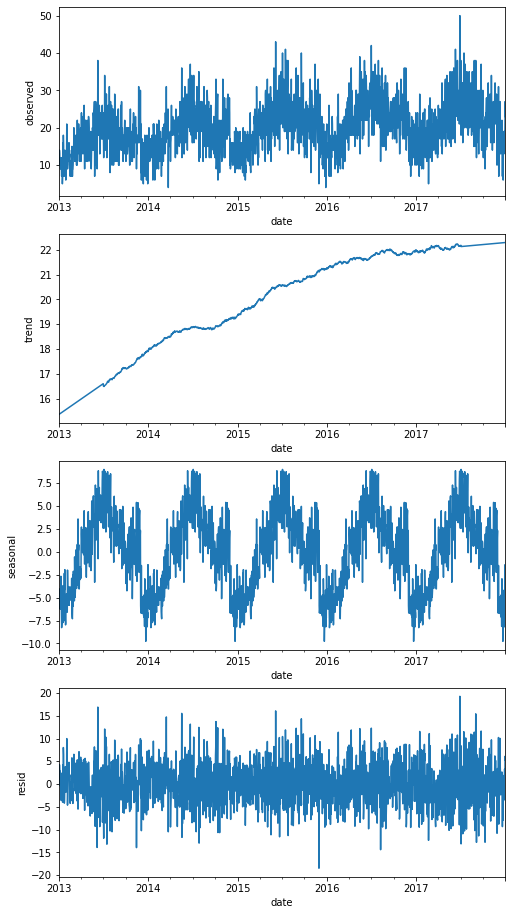

In [57]:
f, ax = plt.subplots(4, 1, figsize=(8,16))
D = seasonal_decompose(item1["sales"], model="additive", period=365, extrapolate_trend="freq")

ax[0].set_ylabel("observed")
ax[1].set_ylabel("trend")
ax[2].set_ylabel("seasonal")
ax[3].set_ylabel("resid")

D.observed.plot(ax=ax[0])
D.trend.plot(ax=ax[1])
D.seasonal.plot(ax=ax[2])
D.resid.plot(ax=ax[3])

In [58]:
export = pd.DataFrame()

for store in df["store"].unique():
    for item in df["item"].unique():
        item_sales = df.query(f"item == {item} & store == {store}").copy()
        D = seasonal_decompose(item_sales["sales"], model="additive", period=365, extrapolate_trend="freq")
        item_sales["trend"] = D.trend
        item_sales["seasonal"] = D.seasonal
        item_sales["resid"] = D.resid
        export = pd.concat([export, item_sales])

In [59]:
export.head()

,store,item,sales,trend,seasonal,resid
date,,,,,,
2013-01-01,1,1,13,15.367598,-4.580308,2.212710
2013-01-02,1,1,11,15.374439,-4.042831,-0.331608
2013-01-03,1,1,14,15.381281,-5.640912,4.259631
2013-01-04,1,1,13,15.388122,-5.445568,3.057446
2013-01-05,1,1,10,15.394964,-5.450772,0.055808


In [60]:
export.shape

(913000, 6)

In [61]:
export.to_csv("export.csv")